# Домашнее задание № 6

### Автор: Кузнецов С.И.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def get_dataset(iris_classes = None):
    '''
    Возвращает датасет iris.
    
    iris_classes - классы ириса, которые будут присутствовать в датасете.
    По умолчанию возвращает весь датасет iris.
    
    Примеры:
    
    set(get_dataset().target) # => {'setosa', 'versicolor', 'virginica'}
    
    set(get_dataset(iris_classes = {'versicolor', 'virginica'}).target)  # => {'versicolor', 'virginica'}
    
    '''
    
    iris = load_iris()
    
    X = pd.DataFrame(iris.data, columns = iris.feature_names)
    X['target'] = [iris.target_names[f] for f in iris.target]
    if iris_classes:
        X = X[X.target.isin(iris_classes)].reset_index().drop('index', axis = 1)
    
    return X

In [3]:
def train_test_split(X, test_part = 0.5):
    '''
    Разбивает выборку на тренировочную и тестовую.
    '''
    test_ind = set(np.random.choice(X.index, size = round(X.shape[0] * test_part)))
    return X.loc[set(X.index) - test_ind], X.loc[test_ind]

Загружаем датасет в формате pandas.DataFrame

In [4]:
df = get_dataset(iris_classes = {'versicolor', 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


Разобьем выборку на обучающую и тестовую

In [5]:
df_train, df_test = train_test_split(df, test_part=0.2)

## Реализуем метод градиентного спуска

In [6]:
def logistic_function(features, weigths):
    '''
    Логистическая функция.
    features - значения фичей,
    weigths - значения весов.
    '''
    return 1 / (1 + np.exp(-np.dot(features, weigths)))

In [7]:
def get_features(X, i):
    '''
    Возвращает набор фичей в виде массива для элемента с индексом i.
    Первый элемен всегда равен 1
    '''
    return(np.append([1], X.loc[i][:-1]).astype(float))

In [8]:
def get_target(X, i):
    '''
    Возвращает целевую переменную для элемента с индексом i.
    Если X[target] = 'versicolor', возвращает 1. В противном случае - 0
    '''
    return 1 if X.loc[i][-1] == 'versicolor' else 0

Определим функцию потерь как:
$$
J(x) = \frac{1}{2m}\sum\limits_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)^2
$$
(см. https://www.internalpointers.com/post/cost-function-logistic-regression)

где
$$
h_{\theta}(x)=\frac{1}{1 + e^{-\theta x}},
$$
$\theta$ - вектор весов:
$$
{\theta} = [\theta_0, \theta_1, \ldots, \theta_n]
$$
$x$ - вектор фичей:
$$
\left[
\begin{array}{c}
1\\
x_1\\
\ldots\\
x_n
\end{array}
\right]
$$

Частная производная функции потерь будет равна:
$$
\frac{\partial}{\partial \theta_j}J(x) = \frac{1}{2}\sum\limits_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x_j^{(i)}
$$



In [9]:
def cost_function(X, weigths):
    '''
    Функция потерь.
    X - исходный датасет,
    weigths - веса
    target - целевая фича
    '''
    total_cost = 0
    for i in X.index:
        total_cost += (logistic_function(get_features(X, i), weigths) - get_target(X, i)) ** 2
        
    return total_cost / (2 * X.shape[0])

In [10]:
def grad_cost_function(X, weigths):
    '''
    Градиент функции потерь.
    Функция потерь.
    X - исходный датасет,
    weigths - веса
    target - целевая фича
    '''
    grad_weigths = np.zeros_like(weigths)
    for i in X.index:
        features = get_features(X, i)
        target = get_target(X, i)
        for j in range(len(grad_weigths)):
            features = get_features(X, i)
            grad_weigths[j] += (logistic_function(features, weigths) - target) * features[j]
    
    return grad_weigths / X.shape[0]

Обучение модели

In [11]:
weigths = np.ones((5,)) * 0.5
alpha = 0.1
gd_cost = []  # Значение функции потерь на каждой эпохе обучения методом градиентного спуска
for epoch in range(101):
    weigths += -grad_cost_function(df_train, weigths) * alpha
    gd_cost.append(cost_function(df_train, weigths))
    if epoch % 10 == 0:
        print('{}:{}:{}'.format(epoch, gd_cost[-1], weigths))

0:0.2533492636644367:[0.44818377 0.15711946 0.34614347 0.21113904 0.39597396]
10:0.11751275288109397:[ 0.42788315 -0.11617611  0.23773707 -0.20326748  0.18938241]
20:0.10810437827805792:[ 0.46470856 -0.02105967  0.29546072 -0.31782014  0.08685092]
30:0.09989693983325879:[ 0.49937208  0.06574698  0.34863305 -0.42845466 -0.01150193]
40:0.09263801295040046:[ 0.53232637  0.14672611  0.39847732 -0.53390299 -0.10540601]
50:0.08620576683851604:[ 0.56380677  0.22300305  0.44558385 -0.63395673 -0.19495586]
60:0.08050076697535126:[ 0.59395951  0.29515826  0.49028468 -0.72881441 -0.28038213]
70:0.07543472324203614:[ 0.62289341  0.36355816  0.53280535 -0.81881093 -0.36195629]
80:0.07092862480420334:[ 0.65070149  0.42849451  0.57332927 -0.90430167 -0.43994903]
90:0.06691211961643116:[ 0.67746803  0.49022836  0.61201886 -0.98562494 -0.51461635]
100:0.06332317017275597:[ 0.70327014  0.54899952  0.6490208  -1.06309389 -0.58619623]


In [12]:
weigths

array([ 0.70327014,  0.54899952,  0.6490208 , -1.06309389, -0.58619623])

In [13]:
def get_score(s, weigths):
    return(logistic_function(np.append([1], s[:4]).astype(float), weigths))

In [14]:
y_score = df_test.apply(get_score, axis = 1, weigths = weigths)
y_target = df_test.target.apply(lambda x: 1 if x == 'versicolor' else 0)

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_target, y_score)

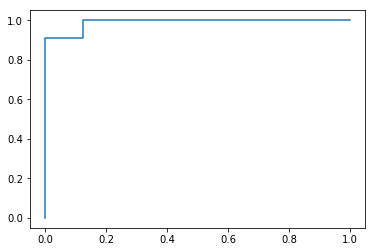

In [16]:
plt.plot(fpr, tpr)

In [17]:
print('GINI: {:.4f}'.format(2 * metrics.roc_auc_score(y_target, y_score) - 1))

GINI: 0.9773


## Реализуем метод nesterov momentum

Реализуем алгоритм поиска локального минимума следующим образом:
$$
\theta = \theta - v_t
$$
где
$$
v_t = \gamma v_{t-1} - \eta \nabla_\theta J(\theta)
$$
см. https://habr.com/ru/post/318970/

In [18]:
weigths = np.ones((5,))*0.5
v = np.zeros_like(weigths)
gamma = 0.9
eta = 0.1
nesterov_cost = []  # Значение функции потерь на каждой эпохе обучения методом Нестерова

In [19]:
for epoch in range(101):
    v = gamma * v - eta * grad_cost_function(df_train, weigths)
    weigths += v
    nesterov_cost.append(cost_function(df_train, weigths))
    if epoch % 10 == 0:
        print('{}:{}:{}'.format(epoch, nesterov_cost[-1], weigths))

0:0.2533492636644367:[0.44818377 0.15711946 0.34614347 0.21113904 0.39597396]
10:0.19441313703879576:[ 0.54404447  0.02027869  0.38986608 -0.84839122 -0.26051699]
20:0.09756305907357253:[ 0.85132264  0.79651684  0.89751004 -1.70853051 -1.02754858]
30:0.05267694884887267:[ 1.11246899  1.39564686  1.29191066 -2.45299388 -1.70801485]
40:0.024254197719507195:[ 1.31934438  1.87235262  1.59471053 -2.88921347 -2.17843532]
50:0.02195068610352202:[ 1.46559696  2.1316672   1.77638677 -3.20948591 -2.52717157]
60:0.020182800057666293:[ 1.5780782   2.27885334  1.89527579 -3.45395242 -2.79935494]
70:0.019037634956526633:[ 1.67930358  2.41536731  2.00314732 -3.61636203 -3.01338505]
80:0.018301328419451073:[ 1.769642    2.52076909  2.09311768 -3.75096733 -3.19891586]
90:0.017657291919612586:[ 1.85158713  2.59879395  2.16805855 -3.8742901  -3.36759368]
100:0.01714871485242114:[ 1.93099159  2.68001387  2.2425563  -3.97254947 -3.51812345]


In [20]:
y_score = df_test.apply(get_score, axis = 1, weigths = weigths)
y_target = df_test.target.apply(lambda x: 1 if x == 'versicolor' else 0)

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_target, y_score)

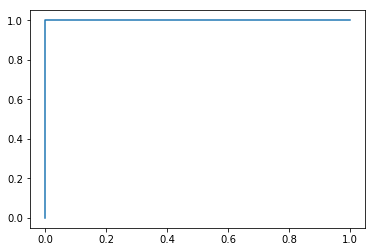

In [22]:
plt.plot(fpr, tpr)

In [23]:
print('GINI: {:.4f}'.format(2 * metrics.roc_auc_score(y_target, y_score) - 1))

GINI: 1.0000


## Реализуем метод rmsprop

Реализуем следующий алгоритм:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}}g_t,
$$
где
$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2
$$
см. https://habr.com/ru/post/318970/

In [24]:
weigths = np.ones((5,)) * 0.5
grd = grad_cost_function(df_train, weigths)
gamma = 0.9
E_g_square = (1 - gamma) * np.dot(grd, grd)
eta = 0.1
epsilon = 0.00001
rmsprop_cost = []  # Значение функции потерь на каждой эпохе обучения методом rmsprop

In [25]:
for epoch in range(101):
    grd = grad_cost_function(df_train, weigths)
    E_g_square = gamma * E_g_square + (1 - gamma) * np.dot(grd, grd)
    weigths -= eta * grd / np.sqrt(E_g_square + epsilon)
    rmsprop_cost.append(cost_function(df_train, weigths))
    if epoch % 10 == 0:
        print('{}:{}:{}'.format(epoch, rmsprop_cost[-1], weigths))

0:0.25867346352412846:[0.47564262 0.33882134 0.4276763  0.36421445 0.45110024]
10:0.12410515210009042:[ 0.40322982 -0.17418527  0.20077295 -0.11193471  0.26592906]
20:0.11839162499493078:[ 0.42447772 -0.12060189  0.23374585 -0.18241162  0.20451184]
30:0.10958818649042705:[ 0.45882056 -0.03455902  0.28667153 -0.29540743  0.10552526]
40:0.09703101933574265:[ 0.51216056  0.09740021  0.36790826 -0.46875961 -0.04756484]
50:0.08127213574241654:[ 0.58975359  0.28518318  0.48394662 -0.71563126 -0.26843258]
60:0.08786456508417198:[ 0.69186364  0.56792297  0.6490515  -0.94245737 -0.50558591]
70:0.06389589639724114:[ 0.71430988  0.58861796  0.67054197 -1.06928922 -0.60083737]
80:0.060744973873117614:[ 0.74667653  0.66400207  0.71791094 -1.16004064 -0.6867424 ]
90:0.06009882290794603:[ 0.7793015   0.74320689  0.76667977 -1.24167432 -0.7681183 ]
100:0.05602503959934757:[ 0.80861392  0.8050615   0.80715808 -1.32955866 -0.84948485]


In [26]:
y_score = df_test.apply(get_score, axis = 1, weigths = weigths)
y_target = df_test.target.apply(lambda x: 1 if x == 'versicolor' else 0)

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_target, y_score)

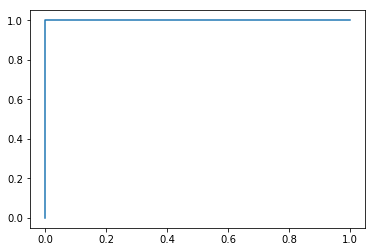

In [28]:
plt.plot(fpr, tpr)

In [29]:
print('GINI: {:.4f}'.format(2 * metrics.roc_auc_score(y_target, y_score) - 1))

GINI: 1.0000


## Сравним методы оптимизации по скорости сходимости

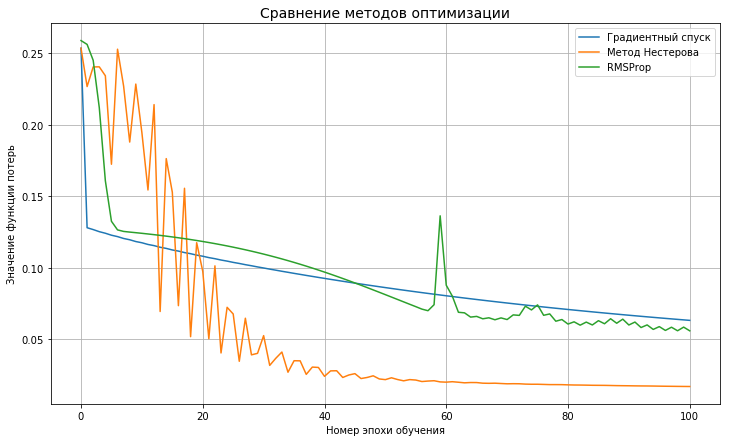

In [30]:
plt.figure(figsize=(12, 7))

plt.plot(np.arange(101), gd_cost)
plt.plot(np.arange(101), nesterov_cost)
plt.plot(np.arange(101), rmsprop_cost)

plt.grid()

plt.legend(['Градиентный спуск', 'Метод Нестерова', 'RMSProp'])
plt.xlabel('Номер эпохи обучения')
plt.ylabel('Значение функции потерь')

plt.title('Сравнение методов оптимизации', fontsize=14)

plt.show()

## Выводы

 * Быстрее всего на данной выборке сходится метод Нестерова.
 * Метод RMSProp сходится немонотонно, но все же быстрее, чем градиентный спуск